# データ概要

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2

In [1]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__) 
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.5.3
1.22.4
3.7.1
0.12.2


In [3]:
# データセットの読み込み
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# # ローカルファイルアップロード
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# # データセットの読み込み
# df = pd.read_csv('diamonds.csv', index_col=0)
# df.head()

In [4]:
# データ形状
df.shape

(53940, 10)

In [5]:
# 欠損値の有無
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# データ型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
# 数値の統計情報
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


# 1数値変数EDA

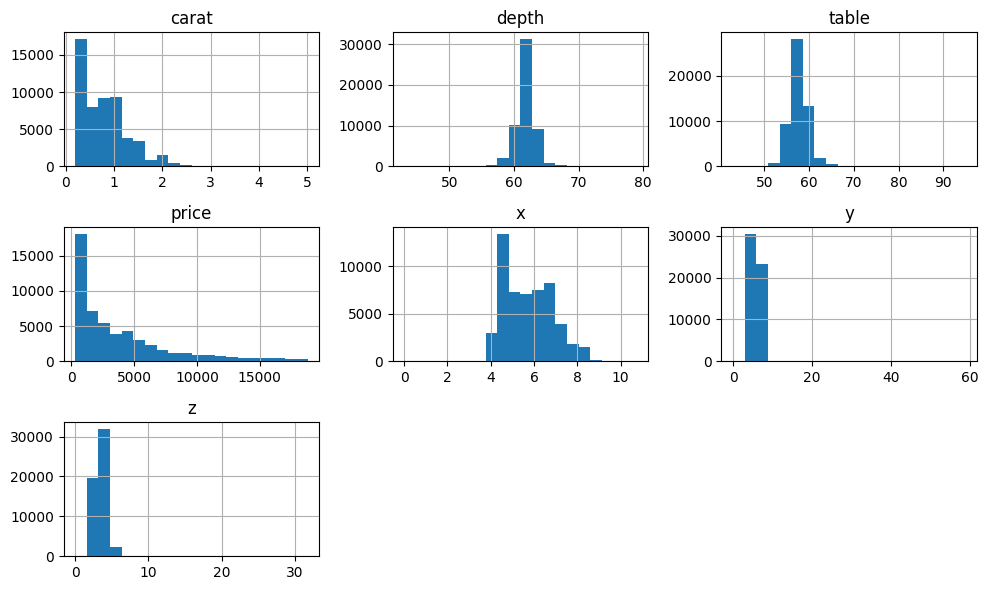

In [8]:
# 数値のヒストグラム
plt.rcParams['figure.figsize'] = (10, 6)
df.hist(bins=20)
plt.tight_layout() 
plt.show()

In [9]:
# ダイヤモンド価格の統計情報
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

<Axes: >

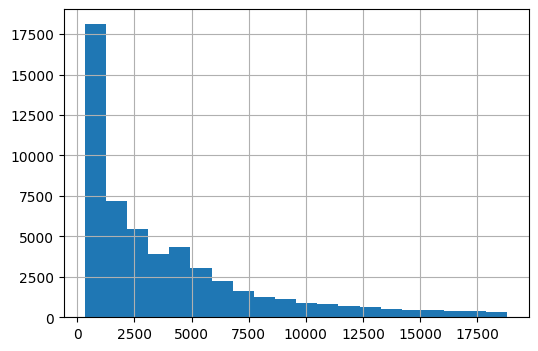

In [10]:
# ダイヤモンド価格のヒストグラム
plt.figure(figsize=(6, 4))
df['price'].hist(bins=20)

#2数値変数EDA

/tmp/ipykernel_1306/1766474630.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

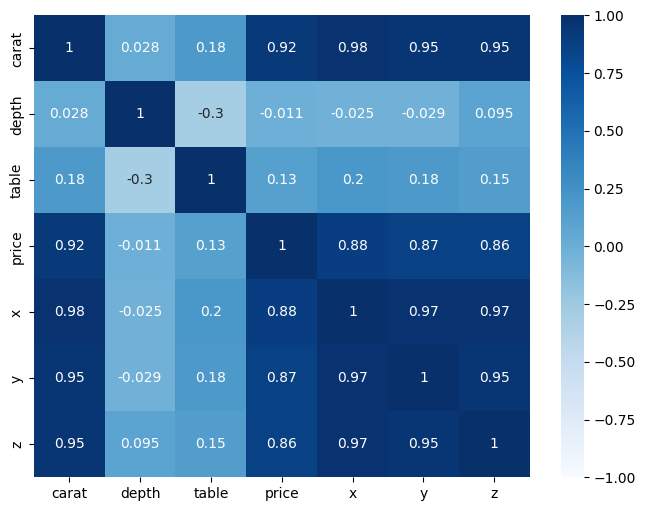

In [11]:
# 相関係数
plt.figure(figsize=(8, 6))
df_corr = df.corr()
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, annot=True, cmap = 'Blues')

/usr/local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


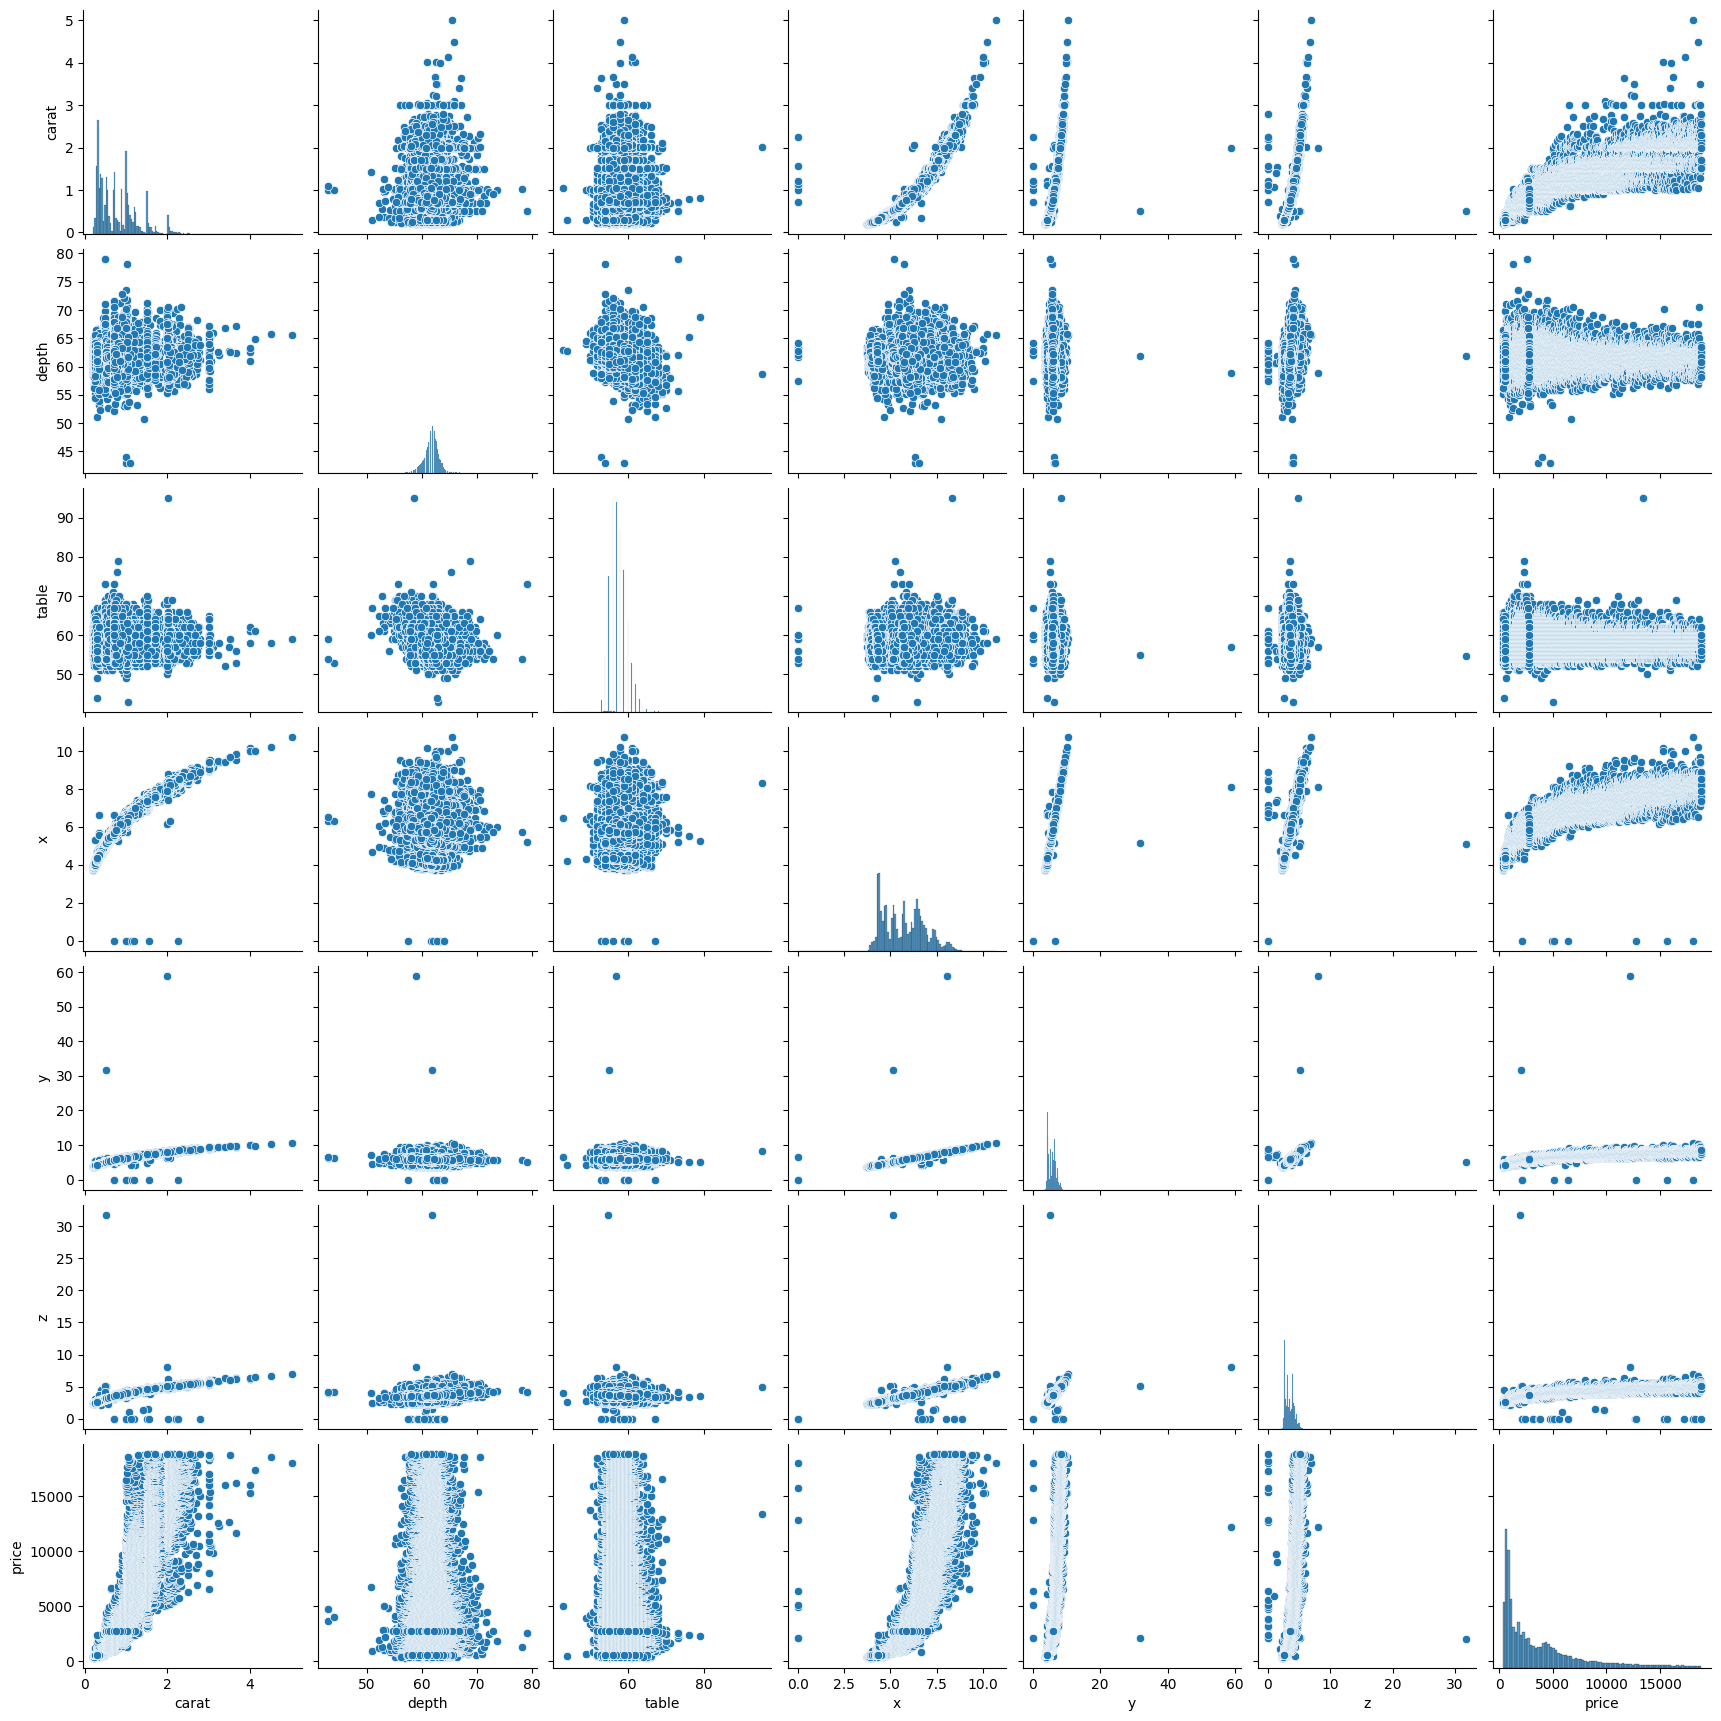

In [12]:
# 数値×数値の散布図
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
sns.pairplot(df[num_cols], size=2.5)

# カテゴリ変数EDA

In [13]:
# カテゴリ変数の統計情報
df.describe(exclude='number').T

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


In [14]:
# カテゴリ変数のリスト
cat_cols = ['cut', 'color', 'clarity']

for col in cat_cols:
    print('%s: %s' % (col, list(df[col].unique())))

cut: ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
color: ['E', 'I', 'J', 'H', 'F', 'G', 'D']
clarity: ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


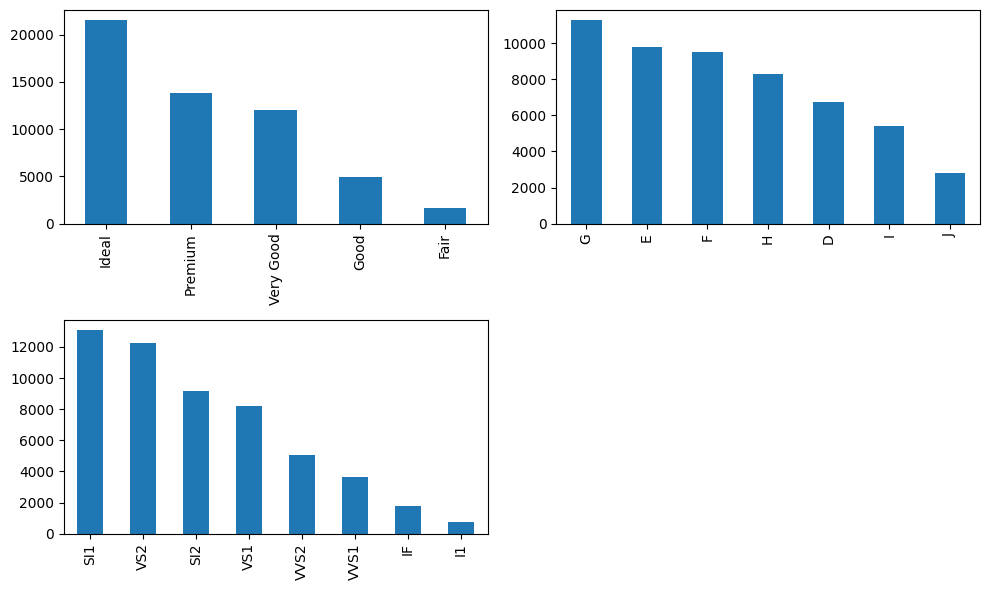

In [15]:
# カテゴリ変数のラベル内訳
plt.rcParams['figure.figsize'] = (10, 6)

for i, name in enumerate(cat_cols):
  ax = plt.subplot(2, 2, i+1)
  df[name].value_counts().plot(kind='bar', ax=ax)

plt.tight_layout() 
plt.show()

# 前処理

In [16]:
# x、y、zが0mmの外れ値
df[(df['x'] == 0) | (df['y'] == 0)| (df['z'] == 0)].shape

(20, 10)

In [17]:
# x、y、zが0mmの外れ値のインデックス
df[(df['x'] == 0) | (df['y'] == 0)| (df['z'] == 0)].index

Int64Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
            24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
            49557, 51506],
           dtype='int64')

In [18]:
# x、y、zが0mmの外れ値の除外
df = df.drop(df[(df['x'] == 0) | (df['y'] == 0)| (df['z'] == 0)].index, axis=0)
df.shape

(53920, 10)

In [19]:
# x、y、zが10mm以上の外れ値
df[(df['x'] >= 10) | (df['y'] >= 10) | (df['z'] >= 10)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [20]:
# x、y、zが10mm以上の外れ値の除外
df = df.drop(df[(df['x'] >= 10) | (df['y'] >= 10) | (df['z'] >= 10)].index, axis=0)
df.reset_index(inplace=True, drop=True)
df.shape

(53911, 10)

In [21]:
# 外れ値除外後の統計値
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53911.0,0.797299,0.472363,0.20,0.40,0.70,1.04,3.67
depth,53911.0,61.749335,1.432118,43.00,61.00,61.80,62.50,79.00
table,53911.0,57.456675,2.233991,43.00,56.00,57.00,59.00,95.00
price,53911.0,3929.487340,3985.129937,326.00,949.00,2401.00,5321.50,18823.00
x,53911.0,5.731109,1.118472,3.73,4.71,5.70,6.54,9.86
y,53911.0,5.732944,1.110381,3.68,4.72,5.71,6.54,9.81
z,53911.0,3.539082,0.690958,1.07,2.91,3.53,4.04,6.38


In [22]:
# ダイヤモンド価格の統計情報（外れ値を除外したあと）
df['price'].describe()

count    53911.000000
mean      3929.487340
std       3985.129937
min        326.000000
25%        949.000000
50%       2401.000000
75%       5321.500000
max      18823.000000
Name: price, dtype: float64

<Axes: >

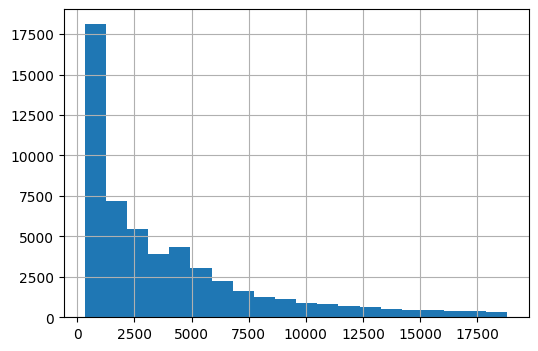

In [23]:
# ダイヤモンド価格のヒストグラム（外れ値除外後）
plt.figure(figsize=(6, 4))
df['price'].hist(bins=20)